Term 'unicorn' refers to privately held startups that have achieved evaluation of $1 billion or more.
The file represents comprehensive snapshot as of June/2023.

1. '^' Graduated Unicorn:  A startup that has been publicaly listed or has been acquired by publicly listed company.
2. '*' Former Unicorn: A startup that lost its unicorn status due to a valuation degrading event. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import relativedelta
import re
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Indian_Unicorn_startups_2023.csv')
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [3]:
df.shape

(102, 8)

As of June 2023, we have 102 Startups in the "Unicorn Club".

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No.                     102 non-null    int64  
 1   Company                 102 non-null    object 
 2   Sector                  102 non-null    object 
 3   Entry Valuation^^ ($B)  102 non-null    float64
 4   Valuation ($B)          102 non-null    float64
 5   Entry                   102 non-null    object 
 6   Location                102 non-null    object 
 7   Select Investors        102 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ KB


No null values are present.

Let's rename some columns to avoid any inconvenience.

In [5]:
df = df.rename(columns={'Entry Valuation^^ ($B)':'Entry_valuation($B)','Valuation ($B)':'Current_valuation($B)','Select Investors':'Investors'})
df.columns

Index(['No.', 'Company', 'Sector', 'Entry_valuation($B)',
       'Current_valuation($B)', 'Entry', 'Location', 'Investors'],
      dtype='object')

Lets check how data is divided with each feature.

In [6]:
df.nunique()

No.                      102
Company                  102
Sector                    75
Entry_valuation($B)       26
Current_valuation($B)     46
Entry                     50
Location                  27
Investors                102
dtype: int64

No. and Company have all unique values.

But, if looked at Company column, There are some values with '^' and '*'. As mentioned at top these are different from a reguler startup. So, lets categarise them.

In [ ]:
def type_assign(company):
    if '^' in company:
        return 'GU'
    elif '*' in company:
        return 'FU'
    else:
        return 'U'
df['Type'] = df['Company'].apply(lambda x: type_assign(x))

If looked at Sector column, it has some values as Sector while some values as Sector-domain. For consistency, lets keep only sector values.

In [8]:
df.Sector = [sector.split(' ')[0] if '-' in sector else sector for sector in df.Sector]

In [9]:
df.Sector.values

array(['Adtech', 'E-Commerce', 'SaaS', 'E-Commerce', 'Fintech',
       'Mobility', 'Marketplace', 'Foodtech', 'E-Commerce', 'Social',
       'Edtech', 'E-Commerce', 'Foodtech', 'Fintech', 'SaaS', 'Proptech',
       'B2B', 'Fintech', 'Logistics Services', 'Logistics', 'E-Commerce',
       'Gaming', 'SaaS', 'SaaS', 'IT', 'Mobility', 'E-Commerce',
       'Fintech', 'E-Commerce', 'SaaS', 'Edtech', 'Fintech',
       'Marketplace', 'Fintech', 'SaaS', 'Content', 'Content', 'Fintech',
       'SaaS', 'B2B', 'NBFC', 'E-Commerce', 'E-Commerce', 'Fintech',
       'E-Commerce', 'Fintech', 'Social Media',
       'Conversational Messaging', 'SaaS', 'Marketplace', 'B2B',
       'Fintech', 'SaaS', 'Logistics Services', 'Marketplace', 'NBFC',
       'Fintech', 'SaaS', 'Edtech', 'Cryptocurrency Exchange', 'Edtech',
       'E-Commerce', 'Marketplace', 'Gaming', 'Marketplace', 'Edtech',
       'D2C', 'Cryptocurrency Exchange', 'Foodtech', 'Marketplace',
       'Fintech', 'D2C', 'Healthtech', 'Aggregator', 

Seems to have worked.

Same is with Location column. Some values are native branches and some are native/foreign branches. for consistency, we will remove the foreign branches.

In [ ]:
locations = [location.split('/')[0] if '/' in location else location for location in df.Location]
df.Location = locations

Now, lets create new column for the time it has been for each startup, since joining the unicorn club.

In [10]:
date2 = datetime.strptime('Jun/2023','%b/%Y')

def time_period(date1,x):
    date2 = datetime.strptime(x,'%b/%Y')
    diff = relativedelta.relativedelta(date1,date2)
    return np.round((diff.years + diff.months/12),2)

df['time_period'] = df['Entry'].apply(lambda x: time_period(date2,x))

In [11]:
df.time_period

0      11.75
1      11.33
2      10.33
3       8.67
4       8.33
       ...  
97      1.00
98      1.00
99      0.92
100     0.83
101     0.75
Name: time_period, Length: 102, dtype: float64

Also, lets create column for change in valuation over this period

In [12]:
df['value_over_period'] = df['Current_valuation($B)'] - df['Entry_valuation($B)']

For per year change,

In [13]:
df['eval_rise_per_year'] = np.round(df['value_over_period']/df['time_period'],2)

Lets see the dataset after all the changes.

In [18]:
df.head()

,No.,Company,Sector,Entry_valuation($B),Current_valuation($B),Entry,Location,Investors,time_period,value_over_period,eval_rise_per_year,Type
0,1,InMobi,Adtech,1.0,1.0,Sep/2011,Bangalore,"KPCB, Sherpalo Ventures, SoftBank",11.75,0.0,0.00,U
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",11.33,36.6,3.23,GU
2,3,Mu Sigma,SaaS,1.0,1.5,Feb/2013,Bangalore,"Accel, Sequoia Capital, General Atlantic",10.33,0.5,0.05,U
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",8.67,0.6,0.07,FU
4,5,PayTM^,Fintech,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",8.33,14.3,1.72,GU


In [19]:
df.describe()

,No.,Entry_valuation($B),Current_valuation($B),time_period,value_over_period,eval_rise_per_year
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020,2.949412,1.850471,0.455588
std,29.588849,1.138013,4.710657,2.314631,4.590741,0.755607
min,1.000000,1.000000,0.568000,0.750000,-0.432000,-0.240000
25%,26.250000,1.000000,1.200000,1.580000,0.000000,0.000000
50%,51.500000,1.200000,1.850000,2.080000,0.000000,0.000000
75%,76.750000,1.582500,3.475000,3.877500,2.000000,0.760000
max,102.000000,10.000000,37.600000,11.750000,36.600000,3.870000


#### UNIVARIATE ANALYSIS

In this section, we will analyse mean,mode,uniques for each feature separately.

##### Sector

In [20]:
df.Sector.nunique()

25

In [21]:
sector_data = df.Sector.value_counts().reset_index().rename(columns={'index':'Sector','Sector':'unicorns'})

In [22]:
print('Top 5 most successful sectors:')
sector_data.head(5)

Top 5 most successful sectors:


,Sector,unicorns
0,Fintech,17
1,SaaS,16
2,E-Commerce,13
3,Marketplace,9
4,Edtech,7


There are <strong>17</strong> startups from <strong>Fintech Sector</strong> that are entered the Unicorn Club.

In [23]:
print('Top 5 least successful sectors:')
sector_data.tail(5)

Top 5 least successful sectors:


,Sector,unicorns
20,Conversational Messaging,1
21,Social Media,1
22,IT,1
23,Social,1
24,Interior,1


##### Entry Valuation

In [24]:
df['Entry_valuation($B)'].mean()

1.5475490196078432

The Avg. valuation at Entry time is <strong>1.5B $</strong>

In [25]:
print('Startup with the most valuation at time of joining Unicorn club:')
print(df[df['Entry_valuation($B)'] == df['Entry_valuation($B)'].max()]['Company'].values[0],':',df['Entry_valuation($B)'].max(),'B$')
print('Startup with the least valuation at time of joining Unicorn club:')
print(df[df['Entry_valuation($B)'] == df['Entry_valuation($B)'].min()]['Company'].values[0],':',df['Entry_valuation($B)'].min(),"B$")

Startup with the most valuation at time of joining Unicorn club:
Polygon : 10.0 B$
Startup with the least valuation at time of joining Unicorn club:
InMobi : 1.0 B$


##### Current valuation

In [26]:
df['Current_valuation($B)'].mean()

3.3980196078431373

The average valuation at the moment for a unicorn is <strong>3.4B $</strong>

In [27]:
print('Startup with the most current valuation:')
print(df[df['Current_valuation($B)'] == df['Current_valuation($B)'].max()]['Company'].values[0],':',df['Current_valuation($B)'].max(),'B$')
print('Startup with the least current valuation:')
print(df[df['Current_valuation($B)'] == df['Current_valuation($B)'].min()]['Company'].values[0],':',df['Current_valuation($B)'].min(),"B$")

Startup with the most current valuation:
Flipkart^ : 37.6 B$
Startup with the least current valuation:
Blinkit^ : 0.568 B$


##### Entry Year

In [28]:
pd.to_datetime(df['Entry']).dt.year.value_counts()

2021    44
2022    21
2020    10
2019     9
2018     8
2015     4
2016     2
2011     1
2012     1
2013     1
2014     1
Name: Entry, dtype: int64

The startup industry were slowly growing till 2015, but rapid change in development is seen as the more and more startups started seeing the success.

##### Location

In [29]:
df.Location.nunique()

11

In [30]:
df.Location.value_counts()

Bangalore    41
Mumbai       17
Gurgaon      14
Delhi         7
Noida         6
Pune          6
Chennai       5
Hyderabad     2
Jaipur        2
Thane         1
Goa           1
Name: Location, dtype: int64

The IT hub of India seems to be attracting the startups for rapid growth.

##### Investors

In [31]:
Investors_data = df[['Company','Investors']]

In [32]:
Investors_data['Investors'] = df['Investors'].apply(lambda x:x.split(','))
Investors_data['Investors']

0                  [KPCB,  Sherpalo Ventures,  SoftBank]
1      [Accel,  Tiger Global,  Naspers,  SoftBank,  T...
2           [Accel,  Sequoia Capital,  General Atlantic]
3      [Kalaari Capital,  Nexus Ventures,  Bessemer, ...
4      [Saama Capital,  Elevation Capital,  Alibaba, ...
                             ...                        
97     [JSW Ventures,  IvyCap Ventures,  Blume Ventur...
98       [Stakeboat Capital,  Gaja Capital,  WestBridge]
99     [QED Investors,  Matrix Partners India,  Sequo...
100    [Lightrock India,  Info Edge,  Tribe Capital, ...
101                            [Temasek,  Motilal Oswal]
Name: Investors, Length: 102, dtype: object

In [33]:
Investors_data = Investors_data.explode('Investors').reset_index(drop=True)
Investors_data.Investors = Investors_data.Investors.str.strip()

In [34]:
df.Investors.nunique()

102

In [35]:
Investors_data.Investors.value_counts()[:10]

Tiger Global             38
Sequoia Capital India    25
SoftBank                 20
Accel India              15
Steadview Capital        14
Elevation Capital        12
Tencent                   9
Norwest                   9
Lightspeed Ventures       9
Alpha Wave Global         8
Name: Investors, dtype: int64

<strong>Tiger Global</strong> as successfully invested in the most Unicorns

##### Type

In [36]:
df.Type.nunique()

3

In [37]:
df.Type.value_counts()

U     87
GU    10
FU     5
Name: Type, dtype: int64

We can see, that 5 of the startups lost their status, while 10 got publicly registerd or aquired by other companies. 

#### BIVARIATE ANALYSIS

In this section, we will analyse the data using multiple features.

In [109]:
company_value = df[['Company','Current_valuation($B)']].sort_values(by='Current_valuation($B)',ascending=False).reset_index(drop=True)
company_value

,Company,Current_valuation($B)
0,Flipkart^,37.600
1,BYJUS,22.000
2,PayTM^,16.000
3,PhonePe^,12.000
4,Swiggy,10.700
...,...,...
97,Hasura,1.000
98,Slice,1.000
99,Fractal,1.000
100,InMobi,1.000


<strong>Flipkart</strong> is the most valuable, followed by <strong>BYJUS</strong> and <strong>PayTM</strong>

In [114]:
value_per_sector = df.groupby('Sector')['Current_valuation($B)'].mean().reset_index()
value_per_sector.sort_values(by='Current_valuation($B)',ascending=False).reset_index(drop=True)

,Sector,Current_valuation($B)
0,Web3,10.000000
1,Mobility,6.150000
2,Foodtech,5.833333
3,Proptech,5.300000
4,E-Commerce,5.228308
5,Social Media,4.900000
6,Edtech,4.864286
7,Gaming,4.266667
8,Fintech,4.176471
9,Content,3.500000


On Average, <strong>Web3</strong> sector is the most valuable.

In [39]:
value_per_location = df.groupby('Location')['Current_valuation($B)'].mean().reset_index().rename(columns={'index':'Sector','Sector':'Avg_Eval($B)'})
value_per_location.sort_values(by='Current_valuation($B)',ascending=False).reset_index(drop=True)

,Location,Current_valuation($B)
0,Noida,5.150000
1,Bangalore,4.517073
2,Gurgaon,2.709857
3,Mumbai,2.517647
4,Thane,2.500000
5,Chennai,2.440000
6,Delhi,2.218571
7,Pune,2.100000
8,Goa,1.530000
9,Jaipur,1.450000


In terms of average valuation, <strong>Noida</strong> takes place over <strong>Bangalore</strong>

In [40]:
eval_rise_data = df[['Company','eval_rise_per_year']].sort_values(by = 'eval_rise_per_year',ascending=False).reset_index(drop=True)
eval_rise_data[:10]

,Company,eval_rise_per_year
0,BYJUS,3.87
1,Flipkart^,3.23
2,PhonePe^,2.60
3,RazorPay,2.43
4,CRED,1.94
5,PharmEasy,1.89
6,Swiggy,1.86
7,OfBusiness,1.82
8,PayTM^,1.72
9,Dream11,1.68


We can see <strong>BYJUS</strong> saw most value rise over its time than any other startup.

In [41]:
eval_rise_by_sector_data = df.groupby('Sector')['eval_rise_per_year'].mean().reset_index()
eval_rise_by_sector_data.sort_values(by='eval_rise_per_year',ascending=False)[:10]

,Sector,eval_rise_per_year
23,Social Media,1.290000
3,Content,1.000000
19,NBFC,0.910000
18,Mobility,0.840000
10,Foodtech,0.810000
8,Edtech,0.738571
9,Fintech,0.694118
2,B2B,0.616667
7,E-Commerce,0.600769
11,Gaming,0.560000


In [129]:
Type_valuation1 = df.groupby('Type')['Current_valuation($B)'].mean().reset_index()
Type_valuation2 = df['Type'].value_counts().reset_index().rename(columns={'index':'Type','Type':'Unicorns'})
Type_valuation = pd.merge(left =Type_valuation1,right=Type_valuation2,how='inner',on='Type')

In [130]:
Type_valuation

,Type,Current_valuation($B),Unicorns
0,FU,1.880000,5
1,GU,8.366800,10
2,U,2.914138,87


We can see the average Current valuation of <strong>GUs</strong> is highest.

##### Visualization

we will visualize, above information using seaborn and matplotlib.

In [44]:
plt.style.use('dark_background')

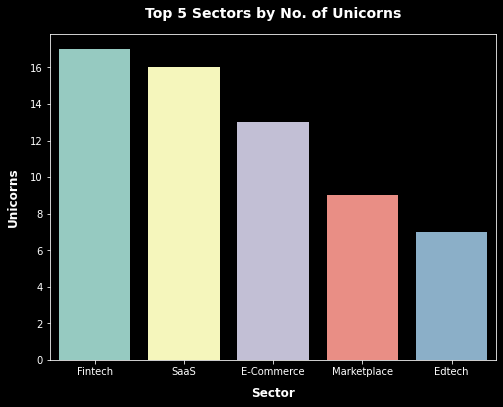

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sector',y='unicorns',data=sector_data.head(5))
plt.title('Top 5 Sectors by No. of Unicorns',y=1.03,fontsize=14,fontweight='bold')
plt.grid(False)
plt.xlabel(xlabel ='Sector',labelpad = 10,fontsize=12,fontweight='bold')
plt.ylabel(ylabel = 'Unicorns',labelpad=10,fontsize=12,fontweight='bold')
plt.show()

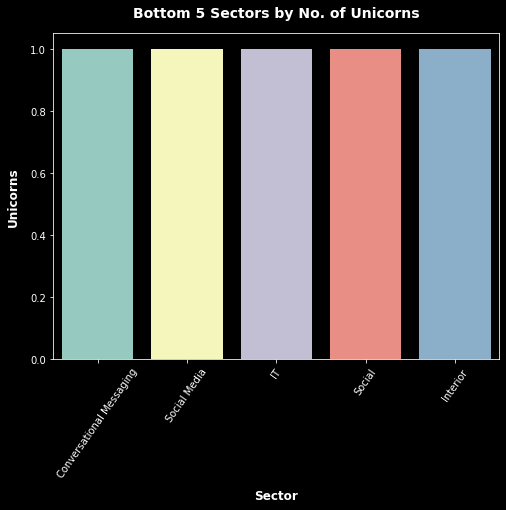

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sector',y='unicorns',data=sector_data.tail(5))
plt.title('Bottom 5 Sectors by No. of Unicorns',y=1.03,fontsize=14,fontweight='bold')
plt.grid(False)
plt.xlabel(xlabel ='Sector',labelpad = 10,fontsize=12,fontweight='bold')
plt.ylabel(ylabel = 'Unicorns',labelpad=10,fontsize=12,fontweight='bold')
plt.xticks(rotation=55)
plt.show()

Text(0, 0.5, 'Current_valuation($B)')

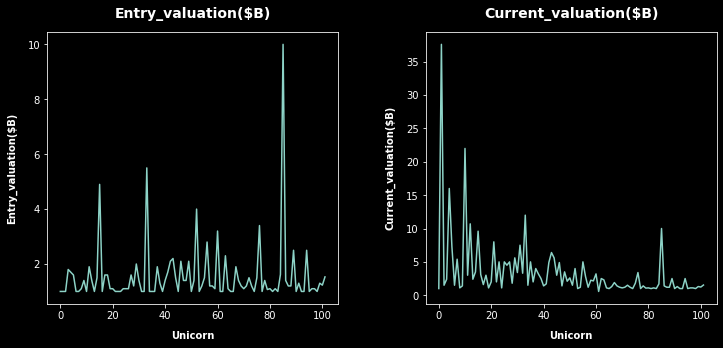

In [84]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
plt.subplots_adjust(wspace=0.3)

ax[0].plot(df['Entry_valuation($B)'])
ax[0].set_title('Entry_valuation($B)',y=1.03,fontsize=14,fontweight='bold')
ax[0].set_xlabel('Unicorn',labelpad=10,fontweight='bold')
ax[0].set_ylabel('Entry_valuation($B)',labelpad=10,fontweight='bold')

ax[1].plot(df['Current_valuation($B)'])
ax[1].set_title('Current_valuation($B)',y=1.03,fontsize=14,fontweight='bold')
ax[1].set_xlabel('Unicorn',labelpad=10,fontweight='bold')
ax[1].set_ylabel('Current_valuation($B)',labelpad=10,fontweight='bold')

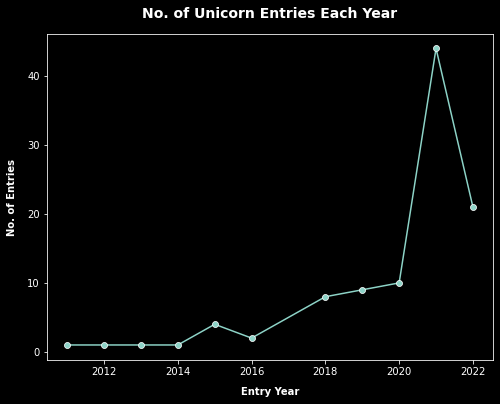

In [106]:
plt.figure(figsize=(8,6))
sns.lineplot(x =pd.to_datetime(df['Entry']).dt.year.value_counts().index,y = pd.to_datetime(df['Entry']).dt.year.value_counts(),marker='o')
plt.title('No. of Unicorn Entries Each Year',y=1.03,fontsize=14,fontweight='bold')
plt.xlabel('Entry Year',labelpad=10,fontweight='bold')
plt.ylabel('No. of Entries',labelpad=10,fontweight='bold')
plt.show()

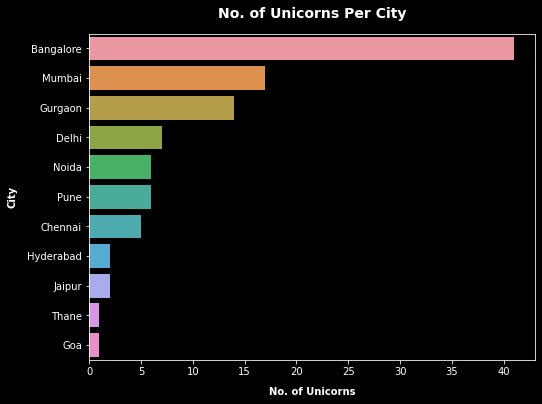

In [101]:
plt.figure(figsize=(8,6))
sns.barplot(x=df.Location.value_counts(),y=df.Location.value_counts().index)
plt.title('No. of Unicorns Per City',y=1.03,fontsize=14,fontweight='bold')
plt.xlabel('No. of Unicorns',labelpad=10,fontweight='bold')
plt.ylabel('City',labelpad=10,fontweight='bold')
plt.show()

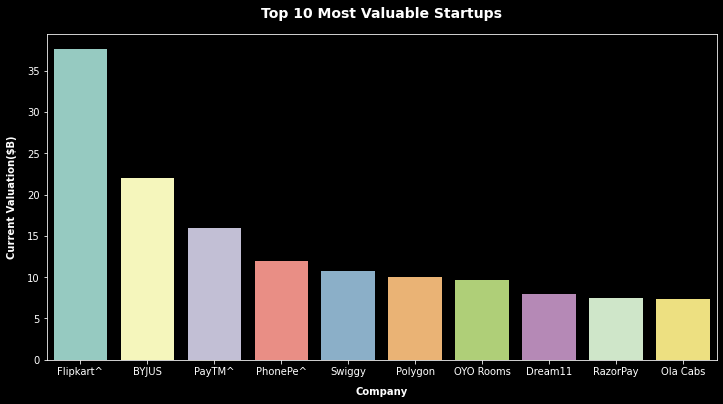

In [110]:
plt.figure(figsize=(12,6))
sns.barplot(x='Company',y='Current_valuation($B)',data=company_value[:10])
plt.title('Top 10 Most Valuable Startups',y=1.03,fontsize=14,fontweight='bold')
plt.xlabel('Company',labelpad=10,fontweight='bold')
plt.ylabel('Current Valuation($B)',labelpad=10,fontweight='bold')
plt.show()

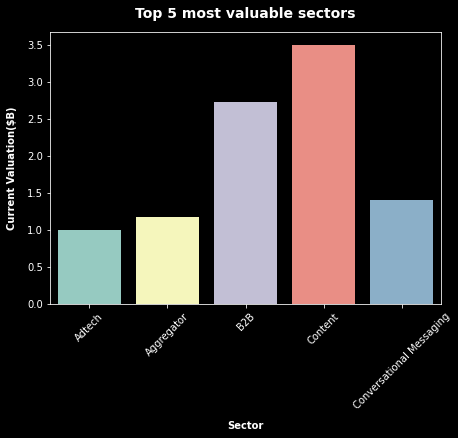

In [118]:
plt.figure(figsize=(7,5))
sns.barplot(x='Sector',y='Current_valuation($B)',data=value_per_sector[:5])
plt.title('Top 5 most valuable sectors',y=1.03,fontsize=14,fontweight='bold')
plt.xlabel('Sector',labelpad=10,fontweight='bold')
plt.ylabel('Current Valuation($B)',labelpad=10,fontweight='bold')
plt.xticks(rotation=45)
plt.show()

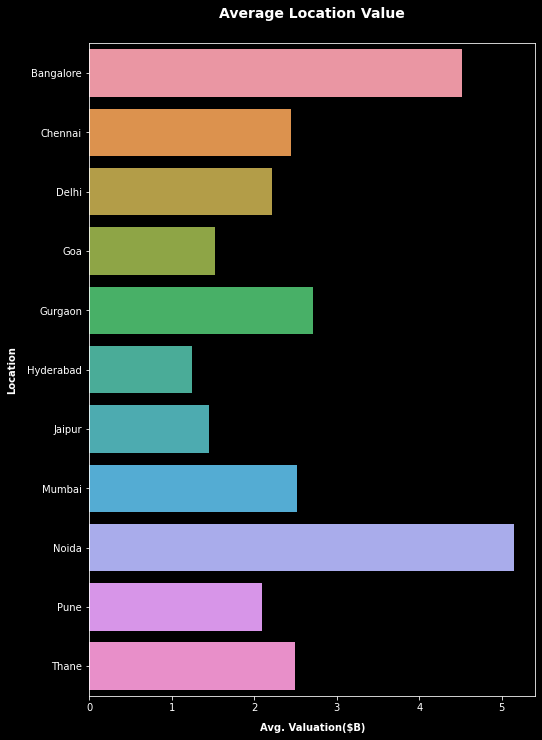

In [119]:
plt.figure(figsize=(8,12))
sns.barplot(x='Current_valuation($B)',y='Location',data=value_per_location)
plt.title('Average Location Value',y=1.03,fontsize=14,fontweight='bold')
plt.xlabel('Avg. Valuation($B)',labelpad=10,fontweight='bold')
plt.ylabel('Location',labelpad=10,fontweight='bold')
plt.show()

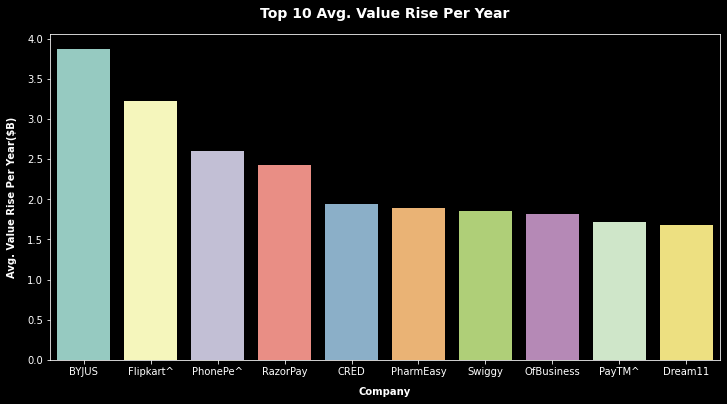

In [122]:
plt.figure(figsize=(12,6))
sns.barplot(x='Company',y='eval_rise_per_year',data=eval_rise_data[:10])
plt.title('Top 10 Avg. Value Rise Per Year',y=1.03,fontsize=14,fontweight='bold')
plt.xlabel('Company',labelpad=10,fontweight='bold')
plt.ylabel('Avg. Value Rise Per Year($B)',labelpad=10,fontweight='bold')
plt.show()

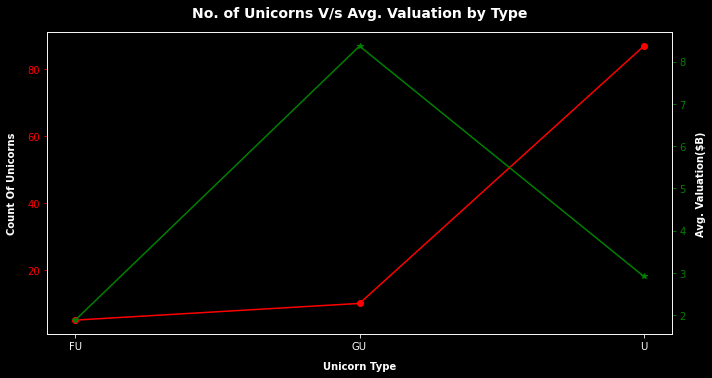

In [142]:
fig,ax1 = plt.subplots(figsize=(10,5))
ax1.set_xlabel('Unicorn Type',fontweight='bold',labelpad=10)
ax1.set_ylabel('Count Of Unicorns',fontweight='bold',labelpad=10)
ax1.plot(Type_valuation['Type'],Type_valuation['Unicorns'],c ='red',marker='o')
ax1.tick_params(axis='y',colors='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Avg. Valuation($B)',fontweight='bold',labelpad=10)
ax2.plot(Type_valuation['Type'],Type_valuation['Current_valuation($B)'],c='Green',marker='*')
ax2.tick_params(axis='y',colors='green')

fig.tight_layout()
plt.title('No. of Unicorns V/s Avg. Valuation by Type',fontsize=14,fontweight='bold',y=1.03)
plt.show()